### Review class

In [191]:
import random

class Sentiment:
    NEGATIVE = "NEGATIVE"
    NEUTRAL = "NEUTRAL"
    POSITIVE = "POSITIVE"

class Review:
    def __init__(self, text, score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment(score)

    def get_sentiment(self, score):
        if self.score <= 2:
            return Sentiment.NEGATIVE
        elif self.score == 3:
            return Sentiment.NEUTRAL
        else:
            return Sentiment.POSITIVE

class Review_Container:
    def __init__(self, reviews):
        self.reviews = reviews

    def evenly_distribute(self):
        random.shuffle(self.reviews)

        negative = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, self.reviews))
        # neutral = list(filter(lambda x: x.sentiment == Sentiment.NEUTRAL, self.reviews))
        positive = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE, self.reviews))
        
        min_len = min(len(negative), 
        # len(neutral), 
        len(positive))
        negative_shrunk = negative[:min_len]
        # neutral_shrunk = neutral[:min_len]
        positive_shrunk = positive[:min_len]

        self.reviews = negative_shrunk + positive_shrunk 
        # + neutral_shrunk 

        random.shuffle(self.reviews)

    def get_text(self):
        return [x.text for x in self.reviews]

    def get_sentiment(self):
        return [x.sentiment for x in self.reviews]


### Load data

In [192]:
import json

file_name = ".\Data\Books_small_10000.json"

reviews = []
with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review["reviewText"], review["overall"]))
reviews[2].text


'I love Nicholas Sparks. I&#8217;ve read everything he&#8217;s written and couldn&#8217;t wait for my copy of Safe Haven to arrive.Safe Haven had a different feel than many of Nicholas Sparks books. It was much less sappy than most of his books. Don&#8217;t get me wrong&#8230; I love sappy but this book was much deeper than many of his other books. It explored life in an abusive relationship and the struggle to escape and start over.I felt a connection to the characters and never lost interest in the story. The audio narration was well done. The only thing that annoyed me was the whiny voice the narrator used for 5 year old Kristen. Fortunately she didn&#8217;t have many lines in the book.This book played out in a predictable manner. Although one thing I have learned from reading Nicholas Sparks is that sometimes he is not predictable and he goes for the heart-break ending. This book did have an unpredictable element to the ending but thankfully it was a touching unpredictable and not 

### Prep data

In [193]:
from sklearn.model_selection import train_test_split

training, testing = train_test_split(reviews, test_size = 0.1, random_state = 42)

train_cont = Review_Container(training)
train_cont.evenly_distribute()

test_cont = Review_Container(testing)
test_cont.evenly_distribute()


In [194]:
train_x = train_cont.get_text()
train_y = train_cont.get_sentiment()

test_x = test_cont.get_text()
test_y = test_cont.get_sentiment()

In [195]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)
print(train_x_vectors[0].toarray())

test_x_vectors = vectorizer.transform(test_x)
print(test_x_vectors[0].toarray())

[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]


### Classification

##### Linear SVM

In [196]:
from sklearn import svm

clf_svm = svm.SVC(kernel = "linear")

clf_svm.fit(train_x_vectors, train_y)

print("True sediment: ", test_y[0])
print("Prediction: ", clf_svm.predict(test_x_vectors[0])[0])

True sediment:  POSITIVE
Prediction:  NEGATIVE


In [197]:
pred_count_svm = 0
pred_svm = clf_svm.predict(test_x_vectors)
for index, true_value in enumerate(test_y):
    if pred_svm[index] == true_value:
        pred_count_svm += 1
print("LINEAR SVM:")
print("True predictions: ", pred_count_svm, " out of ", len(test_y), " reviews.")
acc_svm = pred_count_svm/len(test_y)
print("Accuracy: ", acc_svm, "\n")

LINEAR SVM:
True predictions:  91  out of  112  reviews.
Accuracy:  0.8125 



##### Decision Tree

In [198]:
from sklearn.tree import DecisionTreeClassifier

clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors, train_y)

print("True sediment: ", test_y[0])
print("Prediction: ", clf_dec.predict(test_x_vectors[0])[0])

True sediment:  POSITIVE
Prediction:  POSITIVE


In [199]:
pred_count_dec = 0
pred_dec = clf_dec.predict(test_x_vectors)
for index, true_value in enumerate(test_y):
    if pred_dec[index] == true_value:
        pred_count_dec += 1
print("DECISION TREE:")
print("True predictions: ", pred_count_dec, " out of ", len(test_y), " reviews.")
acc_dec = pred_count_dec/len(test_y)
print("Accuracy: ", acc_dec, "\n")

DECISION TREE:
True predictions:  72  out of  112  reviews.
Accuracy:  0.6428571428571429 



##### Naive Bayes

In [200]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()
clf_gnb.fit(train_x_vectors.toarray(), train_y)

print("True sediment: ", test_y[0])
print("Prediction: ", clf_gnb.predict(test_x_vectors.toarray())[0])

True sediment:  POSITIVE
Prediction:  NEGATIVE


In [201]:
pred_count_gnb = 0
pred_gnb = clf_gnb.predict(test_x_vectors.toarray())
for index, true_value in enumerate(test_y):
    if pred_gnb[index] == true_value:
        pred_count_gnb += 1
print("NAIVE BAYES:")
print("True predictions: ", pred_count_gnb, " out of ", len(test_y), " reviews.")
acc_gnb = pred_count_gnb/len(test_y)
print("Accuracy: ", acc_gnb, "\n")

NAIVE BAYES:
True predictions:  78  out of  112  reviews.
Accuracy:  0.6964285714285714 



##### Logistic Regression

In [202]:
from sklearn.linear_model import LogisticRegression

clf_logr = LogisticRegression()
clf_logr.fit(train_x_vectors, train_y)

print("True sediment: ", test_y[0])
print("Prediction: ", clf_logr.predict(test_x_vectors[0])[0])

True sediment:  POSITIVE
Prediction:  NEGATIVE


In [203]:
pred_count_logr = 0
pred_logr = clf_logr.predict(test_x_vectors)
for index, true_value in enumerate(test_y):
    if pred_logr[index] == true_value:
        pred_count_logr += 1
print("LOGISTIC REGRESSION:")
print("True predictions: ", pred_count_logr, " out of ", len(test_y), " reviews.")
acc_logr = pred_count_logr/len(test_y)
print("Accuracy: ", acc_logr, "\n")

LOGISTIC REGRESSION:
True predictions:  92  out of  112  reviews.
Accuracy:  0.8214285714285714 



### Evaluation

[Text(0, 0, '81.25'),
 Text(0, 0, '64.2857'),
 Text(0, 0, '69.6429'),
 Text(0, 0, '82.1429')]

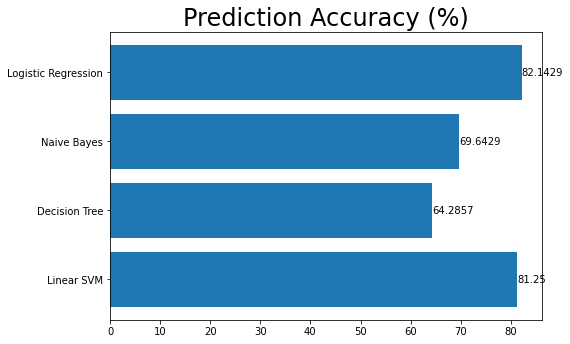

In [204]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Prediction Accuracy (%)", fontsize = 24)

x_labels = ["Linear SVM", "Decision Tree", "Naive Bayes", "Logistic Regression"]
y_val = [acc_svm*100, acc_dec*100, acc_gnb*100, acc_logr*100]

bars = ax.barh(x_labels, y_val)
ax.bar_label(bars)

In [205]:
# Mean Accuracy

print("LINEAR SVM:", clf_svm.score(test_x_vectors, test_y))
print("DECISION TREE:", clf_dec.score(test_x_vectors, test_y))
print("NAIVE BAYES:", clf_gnb.score(test_x_vectors.toarray(), test_y))
print("LOGISTIC REGRESSION:", clf_logr.score(test_x_vectors, test_y))

LINEAR SVM: 0.8125
DECISION TREE: 0.6428571428571429
NAIVE BAYES: 0.6964285714285714
LOGISTIC REGRESSION: 0.8214285714285714


In [206]:
# F1 Scores

from sklearn.metrics import f1_score

# f1_svm = f1_score(test_y, pred_svm, average=None, labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE])
# f1_dec = f1_score(test_y, pred_dec, average=None, labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE])
# f1_gnb = f1_score(test_y, pred_gnb, average=None, labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE])
# f1_logr = f1_score(test_y, pred_logr, average=None, labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE])

f1_svm = f1_score(test_y, pred_svm, average=None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE])
f1_dec = f1_score(test_y, pred_dec, average=None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE])
f1_gnb = f1_score(test_y, pred_gnb, average=None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE])
f1_logr = f1_score(test_y, pred_logr, average=None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE])



print("LINEAR SVM:", f1_svm)
print("DECISION TREE:", f1_dec)
print("NAIVE BAYES:", f1_gnb)
print("LOGISTIC REGRESSION:", f1_logr)

LINEAR SVM: [0.81081081 0.81415929]
DECISION TREE: [0.62962963 0.65517241]
NAIVE BAYES: [0.67924528 0.71186441]
LOGISTIC REGRESSION: [0.81818182 0.8245614 ]


### Tuning the model

##### Grid Search

In [207]:
from sklearn.model_selection import GridSearchCV

svm_parameters = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf', 'linear']}

gs_svm = GridSearchCV(svm.SVC(), svm_parameters, refit = True, verbose = 3, cv = 5)
gs_svm.fit(train_x_vectors, train_y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.831 total time=   0.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.498 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.498 total time=   0.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.498 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.498 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.839 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.804 total time=   0.3s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.762 total time=   0.3s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.830 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.762 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.835 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [208]:
print(gs_svm.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [209]:
print("GRID SEARCHED LINEAR SVM:", gs_svm.score(test_x_vectors, test_y))

GRID SEARCHED LINEAR SVM: 0.8125
